In [28]:
import tensorflow as tf
import keras 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


使用RM、LSTAT及CRIM作為解釋變數，建立多元線性回歸模型，並將迭代運算次數、學習率及權重向量的初始值分別設定為2500、0.001及(1.0, 0.6, 0.8, 1.0)

In [29]:
url = "http://lib.stat.cmu.edu/datasets/boston"
data = pd.read_csv(url,sep='\s+',skiprows=22,header=None)
data

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


In [30]:
x_org = np.hstack([data.values[::2, :], 
    data.values[1::2, :2]])
yt = data.values[1::2, 2]
feature_names = np.array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
    'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT'])
print('元資料', x_org.shape, yt.shape)
print('特徵名: ', feature_names)

元資料 (506, 13) (506,)
特徵名:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [31]:
X_df = pd.DataFrame(x_org)
data_df =  X_df.rename(columns={0:'CRIM',1:'ZN',2:'INDUS',3:'CHAS',4:'NOX',
                                5: 'RM',6: 'AGE',7: 'DIS',8: 'RAD',9: 'TAX',
                                10: 'PTRATIO',11:'B',12: 'LSTAT'})
label = pd.DataFrame(yt,columns=['MEDV'])

資料合併

In [32]:
row_df = data_df.join(label)
row_df.to_csv("Boston_house_price_data.csv")

In [33]:
x = row_df.iloc[:,[5,12,0]].values 
x = np.insert(x, 0, 1.0, axis=1)
x

array([[1.0000e+00, 6.5750e+00, 4.9800e+00, 6.3200e-03],
       [1.0000e+00, 6.4210e+00, 9.1400e+00, 2.7310e-02],
       [1.0000e+00, 7.1850e+00, 4.0300e+00, 2.7290e-02],
       ...,
       [1.0000e+00, 6.9760e+00, 5.6400e+00, 6.0760e-02],
       [1.0000e+00, 6.7940e+00, 6.4800e+00, 1.0959e-01],
       [1.0000e+00, 6.0300e+00, 7.8800e+00, 4.7410e-02]])

In [34]:
y =  row_df.iloc[:,-1].values
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [35]:
M = x.shape[0] #number of feature
D = x.shape[1] #number of sample
epochs = 2500 #number of iteration
learning_rate = 0.001
w = [1.0,0.6,0.8,1.0] #weight init
history = np.zeros((0,2))

In [36]:
for epoch in range(epochs):
    yp = x @ w
    yd = yp - y
    w -= learning_rate * ( x.T @ yd ) / M

    if ( epoch % 100 == 0):
        loss = np.mean(yd**2)/2
        history = np.vstack((history,np.array([epoch,loss])))
        print(f'epoch = {epoch} loss = {loss}')  

epoch = 0 loss = 190.33363731797905
epoch = 100 loss = 26.312042110346063
epoch = 200 loss = 16.461340812424297
epoch = 300 loss = 15.187603098322638
epoch = 400 loss = 15.022847411921548
epoch = 500 loss = 15.001492509117309
epoch = 600 loss = 14.998680595540712
epoch = 700 loss = 14.998266505699313
epoch = 800 loss = 14.998162533514721
epoch = 900 loss = 14.998098720922057
epoch = 1000 loss = 14.99804015999918
epoch = 1100 loss = 14.997982336789065
epoch = 1200 loss = 14.997924667530693
epoch = 1300 loss = 14.997867076670603
epoch = 1400 loss = 14.99780955437093
epoch = 1500 loss = 14.997752099291473
epoch = 1600 loss = 14.997694711190933
epoch = 1700 loss = 14.997637389970182
epoch = 1800 loss = 14.997580135548555
epoch = 1900 loss = 14.997522947847859
epoch = 2000 loss = 14.997465826790295
epoch = 2100 loss = 14.99740877229819
epoch = 2200 loss = 14.997351784293983
epoch = 2300 loss = 14.997294862700185
epoch = 2400 loss = 14.997238007439408


In [37]:
print(f'weight:{w}\n')
print(f'init loss:{history[0,1]}\n')
print(f'final loss:{history[-1,1]}')

weight:[ 1.48553637  4.65886924 -0.62070863 -0.09811901]

init loss:190.33363731797905

final loss:14.997238007439408


In [38]:
y_pred = x @ w
y_pred

array([29.0258525 , 25.72417922, 32.45537838, 32.2602438 , 31.46732268,
       28.20524474, 21.77058701, 18.33932391,  9.12109305, 18.82658552,
       18.479588  , 21.23235204, 19.16108311, 24.01230473, 23.45493667,
       23.3464185 , 24.94825192, 20.20942255, 19.56948191, 21.09407235,
       14.26531819, 20.60768967, 18.35971691, 16.13087188, 18.89351227,
       17.24017277, 19.30892127, 18.83809429, 23.72397657, 25.04438085,
       13.9626873 , 21.54722604, 11.86978395, 16.54274088, 17.10254137,
       23.1118517 , 21.60614538, 23.28844345, 22.97539607, 29.52660667,
       32.97713498, 30.00934704, 26.6058997 , 25.78806473, 23.82040812,
       21.60297669, 19.64024494, 17.88669986,  7.48982898, 17.50747839,
       20.90913644, 24.11698394, 28.53683321, 24.19197298, 19.72913627,
       32.27078461, 27.63959356, 30.78718493, 25.84107213, 23.36558702,
       20.05513503, 20.30046959, 27.37500749, 27.07966609, 29.58352464,
       27.88759797, 22.08605963, 23.83694972, 19.40887585, 23.43

Text(0, 0.5, 'loss')

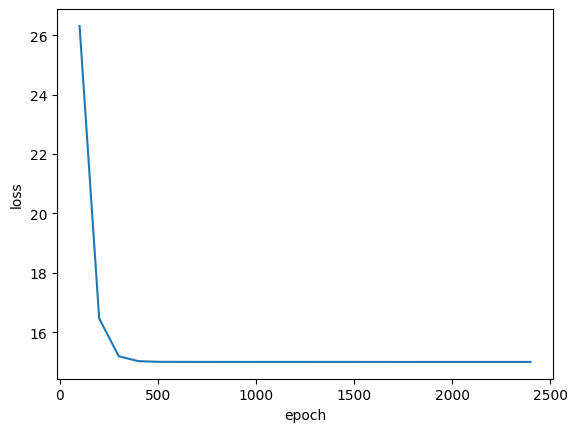

In [39]:
plt.plot(history[1:,0],history[1:,1])
plt.xlabel('epoch')
plt.ylabel('loss')

In [1]:
pip install MetaTrader5

     -------------------------------------- 57.1/57.1 kB 997.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install MyTool

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement MyTool (from versions: none)
ERROR: No matching distribution found for MyTool


In [2]:
pip install mytools


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for mytools: filename=mytools-1.1.3-py3-none-any.whl size=18544 sha256=942c714d26d47afe35d355a138f70c5f3d23f296ff918d9a91da02e74fac8622
  Stored in directory: c:\users\johnn\appdata\local\pip\cache\wheels\19\05\1a\99f71daa9998dbcc1b7d4cceb5152e550bb480e443d0521930
Successfully built mytools


In [3]:
import MetaTrader5 as mt5

In [4]:
mt5.initialize()

False

In [6]:
mt5.AccountInfo()

TypeError: structseq() missing required argument 'sequence' (pos 1)